### Assignment 1

Submission should be in a Jupyter note book (.ipynb)

In [143]:
import numpy as np
import pandas as pd
import math
import time
import timeit
from enum import Enum
import matplotlib.pyplot as plt

1. Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement representation for negative numbers. The function signature is

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


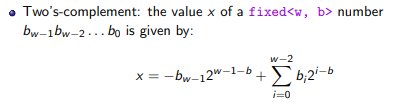

In [144]:
def fromFixedPoint(w: int, b: int, bits: [int]) -> float:
    x1 = 0.00
    #neg = bits[0] == 1
    for i in range(0, w - b):
        if i == 0:
            x1 += -bits[i] * 2 ** (w - b - 1 - i)
        else:
            x1 += bits[i] * 2 ** (w - b - 1 - i)
    print(x1)
    x2 = 0.00
    x2f = [bits[i] for i in range(w - b, w)]
    for i in range(b):
        x2 += x2f[i] * (2 ** (-1 - i))
    print(x2)
    x = x1 + x2
    return x
fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]) 

44.0
0.75


44.75

In [145]:
fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

-14.0
0.71875


-13.28125

In [146]:
fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])

-22.0
0.75


-21.25

2. Manually calculate the prices of the following options step by step using two-step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)?
    

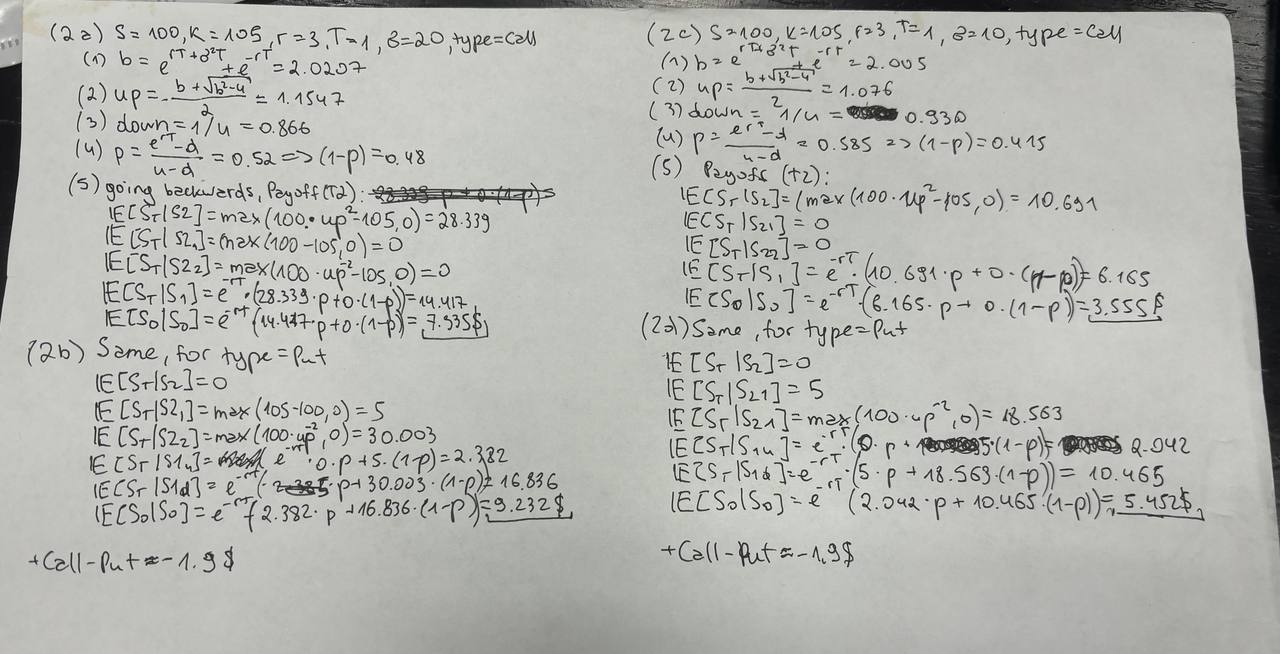

3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks (risk sensitivities) are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho: the rate of change in the price of an option in response to a change in the interest rate.

  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

  \begin{align}
    & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
    & \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} \\
    & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\% \\
    & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004 \\
    & \rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001
  \end{align}

  Implement a Greeks calculater for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2$, plot each greeks as a function of strike for 1 year European call option with strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

In [147]:
# binomial pricer for exercise 3
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

#class AmericanOption():
#    def __init__(self, expiry, strike, payoffType):
#        self.expiry = expiry
#        self.strike = strike
#        self.payoffType = payoffType
#    def payoff(self, S):
#        if self.payoffType == PayoffType.Call:
#            return max(S - self.strike, 0)
#        elif self.payoffType == PayoffType.Put:
#            return max(self.strike - S, 0)
#        else:
#            raise Exception("payoffType not supported: ", self.payoffType)
#    def valueAtNode(self, t, S, continuation):
#        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

### CRR

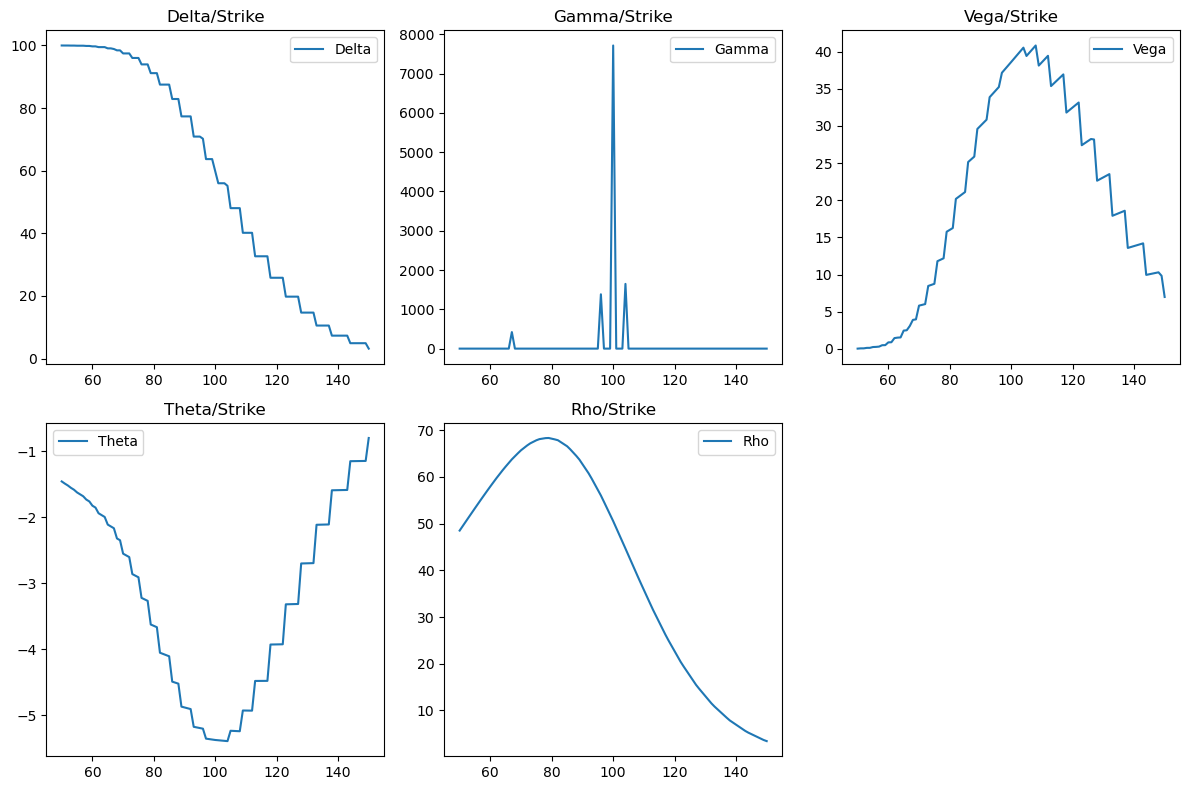

In [149]:
S = 100  
r = 0.03 
vol = 0.2  
T = 1
n = 100
KK = np.arange(50,151,1)

def eurocall_crr(S, K, r, T, sigma, n):
    dt = T / n
    u, d, p = crrCalib(r, sigma, dt)
    ST = S * (u ** np.arange(n, -1, -1)) * (d ** np.arange(0, n+1, 1))
    payoff = np.maximum(ST - K, 0)
    for j in range(n-1, -1, -1):
        payoff = (np.exp(-r * dt) * (p * payoff[:-1] + (1 - p) * payoff[1:]))
    return payoff[0]


def greeks_crr(S, r, vol, T, k, greek_type, delta_s=0.001, delta_vol=0.001, delta_t=0.001, delta_r=0.0001):
    if greek_type == 'delta':
        option_price_up = eurocall_crr(S * (1 + delta_s), k, r, T, vol, 100)
        option_price_down = eurocall_crr(S * (1 - delta_s), k, r, T, vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_s)
    
    elif greek_type == 'gamma':
        option_price_up = eurocall_crr(S * (1 + delta_s), k, r, T, vol, 100)
        option_price_down = eurocall_crr(S * (1 - delta_s), k, r, T, vol, 100)
        option_price_mid = eurocall_crr(S, k, r, T, vol, 100)
        return (option_price_up - 2 * option_price_mid + option_price_down) / (delta_s ** 2)
    
    elif greek_type == 'vega':
        option_price_up = eurocall_crr(S, k, r, T, vol + delta_vol, 100)
        option_price_down = eurocall_crr(S, k, r, T, vol - delta_vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_vol)
    
    elif greek_type == 'theta':
        option_price_up = eurocall_crr(S, k, r, T - delta_t, vol, 100)
        option_price_down = eurocall_crr(S, k, r, T, vol, 100)
        return (option_price_up - option_price_down) / delta_t
    
    elif greek_type == 'rho':
        option_price_up = eurocall_crr(S, k, r + delta_r, T, vol, 100)
        option_price_down = eurocall_crr(S, k, r - delta_r, T, vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_r)

d = [greeks_crr(S, r, vol, T, k, 'delta') for k in KK]
g = [greeks_crr(S, r, vol, T, k, 'gamma') for k in KK]
v = [greeks_crr(S, r, vol, T, k, 'vega') for k in KK]
t = [greeks_crr(S, r, vol, T, k, 'theta') for k in KK]
r = [greeks_crr(S, r, vol, T, k, 'rho') for k in KK]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(KK, d, label='Delta')
plt.title('Delta/k')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(KK, g, label='Gamma')
plt.title('Gamma/k')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(KK, v, label='Vega')
plt.title('Vega/k')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(KK, t, label='Theta')
plt.title('Theta/k')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(KK, r, label='Rho')
plt.title('Rho/k')
plt.legend()

plt.tight_layout()
plt.show()

### JRRN

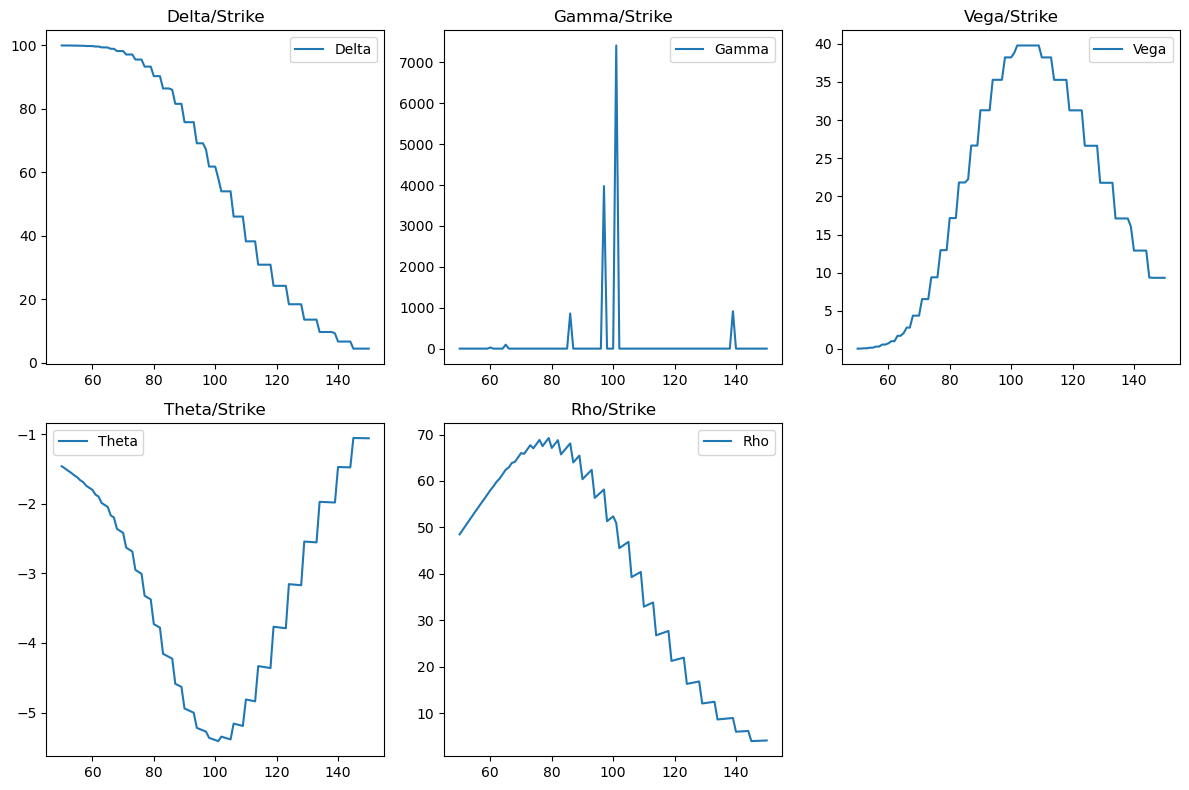

In [158]:
S = 100  
r = 0.03 
vol = 0.2  
T = 1
n = 100
KK = np.arange(50,151,1)

def eurocall_jrrn(S, K, r, T, sigma, n):
    dt = T / n
    u, d, p = jrrnCalib(r, sigma, dt)
    ST = S * (u ** np.arange(n, -1, -1)) * (d ** np.arange(0, n+1, 1))
    payoff = np.maximum(ST - K, 0)
    for j in range(n-1, -1, -1):
        payoff = (np.exp(-r * dt) * (p * payoff[:-1] + (1 - p) * payoff[1:]))
    return payoff[0]

def greeks_jrrn(S, r, vol, T, k, greek_type, delta_s=0.001, delta_vol=0.001, delta_t=0.001, delta_r=0.0001):
    if greek_type == 'delta':
        option_price_up = eurocall_jrrn(S * (1 + delta_s), k, r, T, vol, 100)
        option_price_down = eurocall_jrrn(S * (1 - delta_s), k, r, T, vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_s)
    
    elif greek_type == 'gamma':
        option_price_up = eurocall_jrrn(S * (1 + delta_s), k, r, T, vol, 100)
        option_price_down = eurocall_jrrn(S * (1 - delta_s), k, r, T, vol, 100)
        option_price_mid = eurocall_jrrn(S, k, r, T, vol, 100)
        return (option_price_up - 2 * option_price_mid + option_price_down) / (delta_s ** 2)
    
    elif greek_type == 'vega':
        option_price_up = eurocall_jrrn(S, k, r, T, vol + delta_vol, 100)
        option_price_down = eurocall_jrrn(S, k, r, T, vol - delta_vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_vol)
    
    elif greek_type == 'theta':
        option_price_up = eurocall_jrrn(S, k, r, T - delta_t, vol, 100)
        option_price_down = eurocall_jrrn(S, k, r, T, vol, 100)
        return (option_price_up - option_price_down) / delta_t
    
    elif greek_type == 'rho':
        option_price_up = eurocall_jrrn(S, k, r + delta_r, T, vol, 100)
        option_price_down = eurocall_jrrn(S, k, r - delta_r, T, vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_r)

d = [greeks_jrrn(S, r, vol, T, k, 'delta') for k in KK]
g = [greeks_jrrn(S, r, vol, T, k, 'gamma') for k in KK]
v = [greeks_jrrn(S, r, vol, T, k, 'vega') for k in KK]
t = [greeks_jrrn(S, r, vol, T, k, 'theta') for k in KK]
r = [greeks_jrrn(S, r, vol, T, k, 'rho') for k in KK]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(KK, d, label='Delta')
plt.title('Delta/k')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(KK, g, label='Gamma')
plt.title('Gamma/k')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(KK, v, label='Vega')
plt.title('Vega/k')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(KK, t, label='Theta')
plt.title('Theta/k')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(KK, r, label='Rho')
plt.title('Rho/k')
plt.legend()

plt.tight_layout()
plt.show()

### JREQ

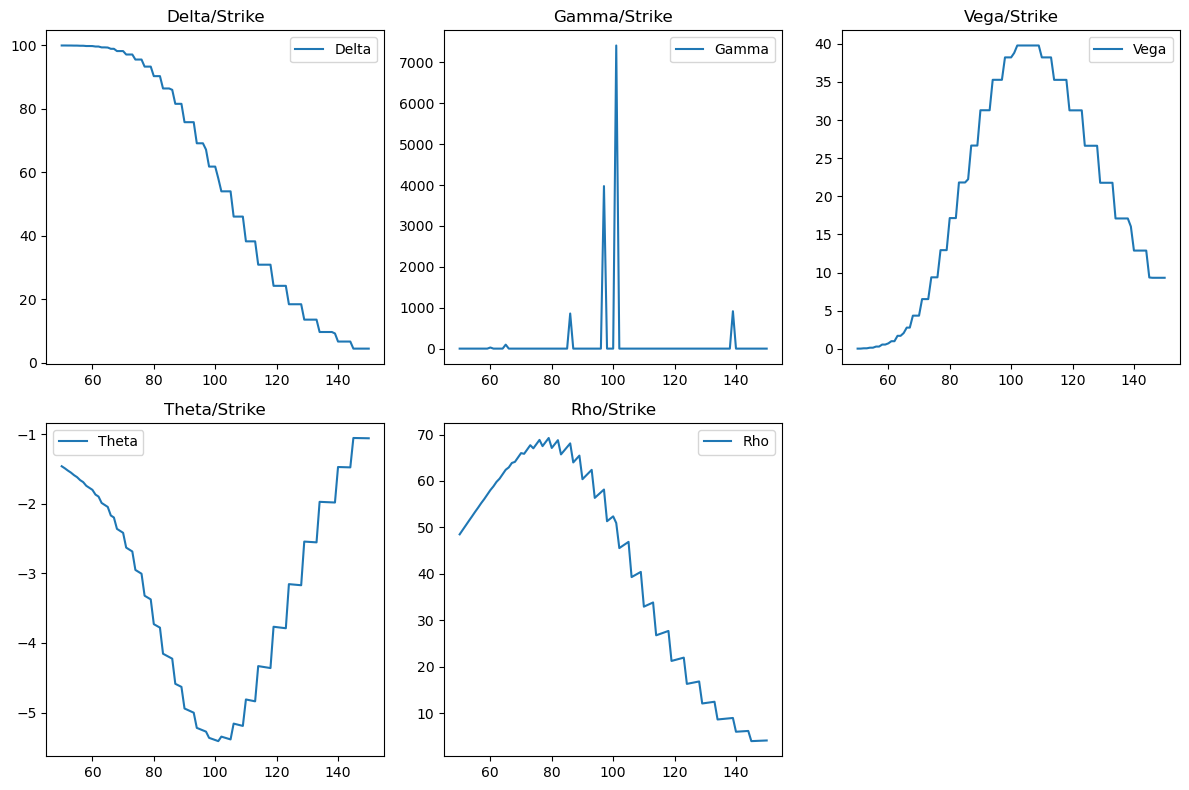

In [159]:
S = 100  
r = 0.03 
vol = 0.2  
T = 1
n = 100
KK = np.arange(50,151,1)

def eurocall_jreq(S, K, r, T, sigma, n):
    dt = T / n
    u, d, p = jreqCalib(r, sigma, dt)
    ST = S * (u ** np.arange(n, -1, -1)) * (d ** np.arange(0, n+1, 1))
    payoff = np.maximum(ST - K, 0)
    for j in range(n-1, -1, -1):
        payoff = (np.exp(-r * dt) * (p * payoff[:-1] + (1 - p) * payoff[1:]))
    return payoff[0]

def greeks_jreq(S, r, vol, T, k, greek_type, delta_s=0.001, delta_vol=0.001, delta_t=0.001, delta_r=0.0001):
    if greek_type == 'delta':
        option_price_up = eurocall_jreq(S * (1 + delta_s), k, r, T, vol, 100)
        option_price_down = eurocall_jreq(S * (1 - delta_s), k, r, T, vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_s)
    
    elif greek_type == 'gamma':
        option_price_up = eurocall_jreq(S * (1 + delta_s), k, r, T, vol, 100)
        option_price_down = eurocall_jreq(S * (1 - delta_s), k, r, T, vol, 100)
        option_price_mid = eurocall_jreq(S, k, r, T, vol, 100)
        return (option_price_up - 2 * option_price_mid + option_price_down) / (delta_s ** 2)
    
    elif greek_type == 'vega':
        option_price_up = eurocall_jreq(S, k, r, T, vol + delta_vol, 100)
        option_price_down = eurocall_jreq(S, k, r, T, vol - delta_vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_vol)
    
    elif greek_type == 'theta':
        option_price_up = eurocall_jreq(S, k, r, T - delta_t, vol, 100)
        option_price_down = eurocall_jreq(S, k, r, T, vol, 100)
        return (option_price_up - option_price_down) / delta_t
    
    elif greek_type == 'rho':
        option_price_up = eurocall_jreq(S, k, r + delta_r, T, vol, 100)
        option_price_down = eurocall_jreq(S, k, r - delta_r, T, vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_r)

d = [greeks_jreq(S, r, vol, T, k, 'delta') for k in KK]
g = [greeks_jreq(S, r, vol, T, k, 'gamma') for k in KK]
v = [greeks_jreq(S, r, vol, T, k, 'vega') for k in KK]
t = [greeks_jreq(S, r, vol, T, k, 'theta') for k in KK]
r = [greeks_jreq(S, r, vol, T, k, 'rho') for k in KK]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(KK, d, label='Delta')
plt.title('Delta/k')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(KK, g, label='Gamma')
plt.title('Gamma/k')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(KK, v, label='Vega')
plt.title('Vega/k')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(KK, t, label='Theta')
plt.title('Theta/k')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(KK, r, label='Rho')
plt.title('Rho/k')
plt.legend()

plt.tight_layout()
plt.show()

### Tian

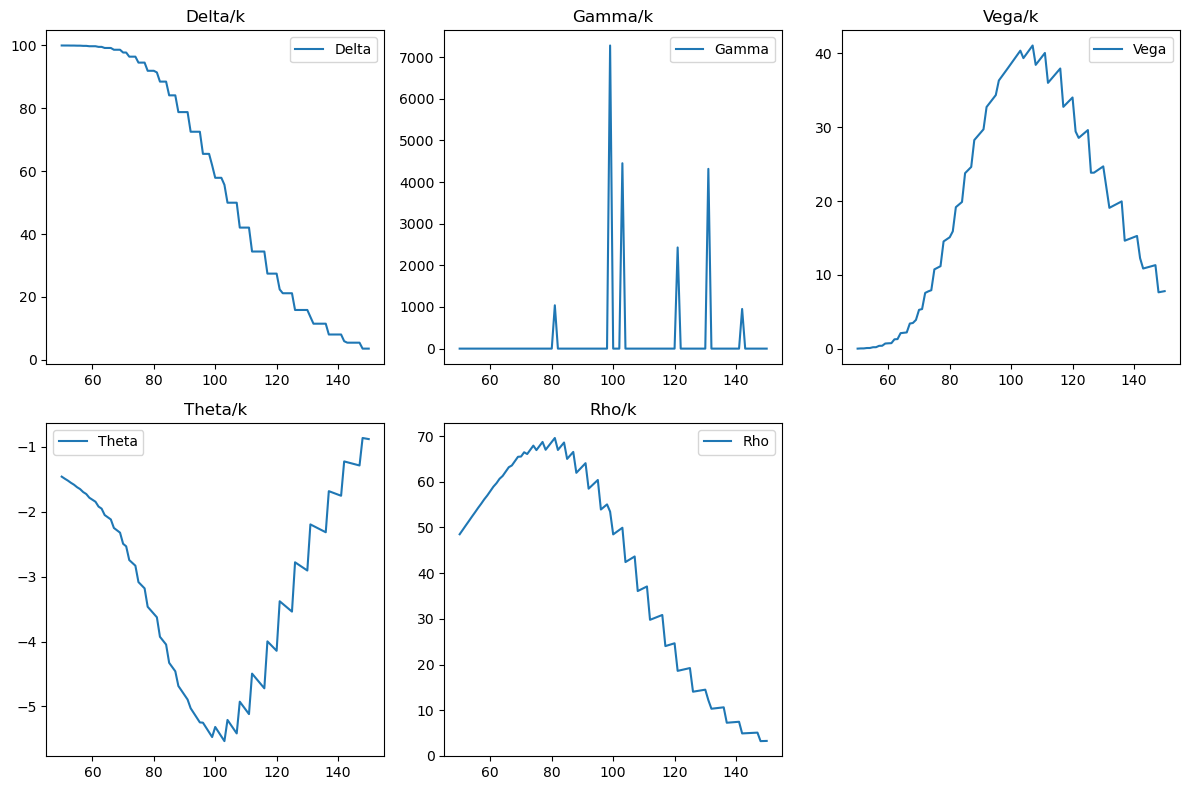

In [162]:
S = 100  
r = 0.03 
vol = 0.2  
T = 1
n = 100
KK = np.arange(50,151,1)

def eurocall_tian(S, K, r, T, sigma, n):
    dt = T / n
    u, d, p = tianCalib(r, sigma, dt)
    ST = S * (u ** np.arange(n, -1, -1)) * (d ** np.arange(0, n+1, 1))
    payoff = np.maximum(ST - K, 0)
    for j in range(n-1, -1, -1):
        payoff = (np.exp(-r * dt) * (p * payoff[:-1] + (1 - p) * payoff[1:]))
    return payoff[0]

def greeks_tian(S, r, vol, T, k, greek_type, delta_s=0.001, delta_vol=0.001, delta_t=0.001, delta_r=0.0001):
    if greek_type == 'delta':
        option_price_up = eurocall_tian(S * (1 + delta_s), k, r, T, vol, 100)
        option_price_down = eurocall_tian(S * (1 - delta_s), k, r, T, vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_s)
    
    elif greek_type == 'gamma':
        option_price_up = eurocall_tian(S * (1 + delta_s), k, r, T, vol, 100)
        option_price_down = eurocall_tian(S * (1 - delta_s), k, r, T, vol, 100)
        option_price_mid = eurocall_tian(S, k, r, T, vol, 100)
        return (option_price_up - 2 * option_price_mid + option_price_down) / (delta_s ** 2)
    
    elif greek_type == 'vega':
        option_price_up = eurocall_tian(S, k, r, T, vol + delta_vol, 100)
        option_price_down = eurocall_tian(S, k, r, T, vol - delta_vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_vol)
    
    elif greek_type == 'theta':
        option_price_up = eurocall_tian(S, k, r, T - delta_t, vol, 100)
        option_price_down = eurocall_tian(S, k, r, T, vol, 100)
        return (option_price_up - option_price_down) / delta_t
    
    elif greek_type == 'rho':
        option_price_up = eurocall_tian(S, k, r + delta_r, T, vol, 100)
        option_price_down = eurocall_tian(S, k, r - delta_r, T, vol, 100)
        return (option_price_up - option_price_down) / (2 * delta_r)

d = [greeks_tian(S, r, vol, T, k, 'delta') for k in KK]
g = [greeks_tian(S, r, vol, T, k, 'gamma') for k in KK]
v = [greeks_tian(S, r, vol, T, k, 'vega') for k in KK]
t = [greeks_tian(S, r, vol, T, k, 'theta') for k in KK]
r = [greeks_tian(S, r, vol, T, k, 'rho') for k in KK]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(KK, d, label='Delta')
plt.title('Delta/k')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(KK, g, label='Gamma')
plt.title('Gamma/k')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(KK, v, label='Vega')
plt.title('Vega/k')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(KK, t, label='Theta')
plt.title('Theta/k')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(KK, r, label='Rho')
plt.title('Rho/k')
plt.legend()

plt.tight_layout()
plt.show()